<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика.

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Этап решения #1: загрузка данных
Для начала выведем случайные 10 строчек:


In [ ]:
# original_data = data.copy()
data.sample(10, random_state=42)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1448,9,45.40,418.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4792,37,70.35,2552.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3964,44,100.10,4378.35,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0
1942,39,50.75,2011.4,Female,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
1859,52,79.20,4016.3,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,0
2348,1,74.40,74.4,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
2280,6,50.80,288.05,Female,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),1
733,21,68.65,1493.2,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0


Наблюдается частичная зависимость категориальных признаков
- HasOnlineSecurityService
- HasOnlineBackup
- HasDeviceProtection
- HasTechSupportAccess
- HasOnlineTV
- HasMovieSubscription

От категориального признака HasInternetService.
Категория No internet service в этих признаках частично зависисма категории No.

Проверим типы данных:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Большинство категориальных признаков по сути являются строками. Попробуем автоматическое преобразование:

In [ ]:
data = data.convert_dtypes()
data.dtypes

ClientPeriod                  Int64
MonthlySpending             Float64
TotalSpent                   string
Sex                          string
IsSeniorCitizen               Int64
HasPartner                   string
HasChild                     string
HasPhoneService              string
HasMultiplePhoneNumbers      string
HasInternetService           string
HasOnlineSecurityService     string
HasOnlineBackup              string
HasDeviceProtection          string
HasTechSupportAccess         string
HasOnlineTV                  string
HasMovieSubscription         string
HasContractPhone             string
IsBillingPaperless           string
PaymentMethod                string
Churn                         Int64
dtype: object

Приведём данные к более удобному виду, а для согласованности представления с остальными категориальными признаками переведем признак IsSeniorCitizen в текстовую форму:

In [ ]:
print("Возможные значения IsSeniorCitizen до преобразования:\n")
print(data['IsSeniorCitizen'].value_counts())
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype('object')
data.loc[data['IsSeniorCitizen'] == 1, 'IsSeniorCitizen'] = 'Yes'
data.loc[data['IsSeniorCitizen'] == 0, 'IsSeniorCitizen'] = 'No'
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].astype('string')
print("\nВозможные значения IsSeniorCitizen после преобразования:\n")
print(data['IsSeniorCitizen'].value_counts())
print("\nТипы после преобразования:")
data.dtypes

Возможные значения IsSeniorCitizen до преобразования:

0    4440
1     842
Name: IsSeniorCitizen, dtype: Int64

Возможные значения IsSeniorCitizen после преобразования:

No     4440
Yes     842
Name: IsSeniorCitizen, dtype: Int64

Типы после преобразования:


ClientPeriod                  Int64
MonthlySpending             Float64
TotalSpent                   string
Sex                          string
IsSeniorCitizen              string
HasPartner                   string
HasChild                     string
HasPhoneService              string
HasMultiplePhoneNumbers      string
HasInternetService           string
HasOnlineSecurityService     string
HasOnlineBackup              string
HasDeviceProtection          string
HasTechSupportAccess         string
HasOnlineTV                  string
HasMovieSubscription         string
HasContractPhone             string
IsBillingPaperless           string
PaymentMethod                string
Churn                         Int64
dtype: object

Колонка TotalSpent, очевидно содержащая вещественные числа, имеет строковый тип. Попробуем сконвертировать колонку TotalSpent к корректному типу.

In [ ]:
try:
    data['TotalSpent'] = data['TotalSpent'].astype('float64')
except ValueError as e:
    print("С данными что-то не то:", e)

С данными что-то не то: could not convert string to float: ' '


Не удалось, очевидно автоматическое преобразование не сработало неспроста. Эта колонка, а также колонки с категориальными признаками могут содержать отсутствующие значения в виде пустых и пробельных строк. Проверим и исправим это, а затем сконвертируем колонку TotalSpent к корректному типу:

In [ ]:
import re
import numpy as np

def check_for_empy_strings(df):
    df.applymap(lambda x: bool(re.match(r"^\s*$", str(x)))).any(axis=None)

tested_cols = ['TotalSpent'] + cat_cols
flag = check_for_empy_strings(data[tested_cols])
print("Отсутствующие данные в виде пустых и пробельных строк:", "есть" if flag else "нет")
# TODO: showing a list of columns with cells containing empty or space strings
if flag:
    for col in tested_cols:
        data[col][data[col].map(lambda x: bool(re.match(r"^\s*$", str(x))))] = np.nan
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
print("Новый тип TotalSpent:", data['TotalSpent'].dtype)
flag = check_for_empy_strings(data[tested_cols])
print("Отсутствующие данные в виде пустых и пробельных строк после преобразования:", "есть" if flag else "нет")

Отсутствующие данные в виде пустых и пробельных строк: нет
Новый тип TotalSpent: float64
Отсутствующие данные в виде пустых и пробельных строк после преобразования: нет


Проверим данные на отсуствующие значения:

In [ ]:
table = data.isna().sum()
print("Количество nan по колонкам:", table, sep="\n\n")
print("\nПропуски в данных:", "нет" if (table == 0).all() else "есть")
print("Список колонок, в которых есть пропуски:", ', '.join(table[table != 0].index))

Количество nan по колонкам:

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропуски в данных: нет
Список колонок, в которых есть пропуски: 


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

## Этап решения #2: анализ данных
Построим графики для числовых признаков:

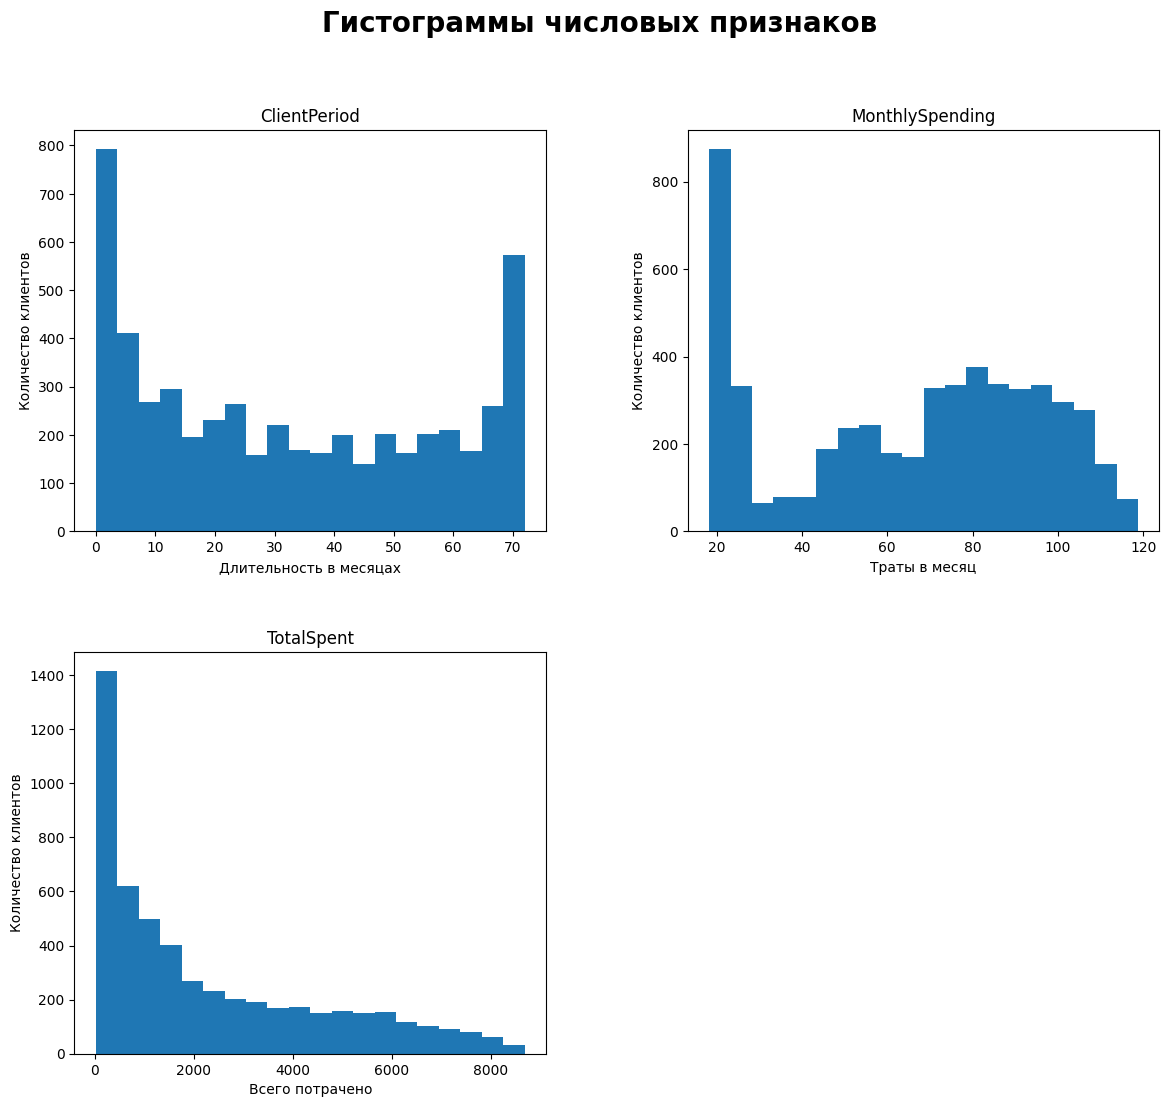

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

col_labels = ["Длительность в месяцах", "Траты в месяц", "Всего потрачено"]
subplots_shape = (2, 2)
fig = plt.figure(figsize=(14, 12))
fig.suptitle("Гистограммы числовых признаков", fontweight="bold", fontsize=20)
for i, (col, xlabel) in enumerate(zip(num_cols, col_labels), 1):
    ax = plt.subplot(*subplots_shape, i)
    ax.set_title(col, fontsize=16, fontweight="bold")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Количество клиентов")
    data.hist(column=col, ax=ax, bins=20, grid=False)
    # ax.hist(data[col], bins=20)  # works too

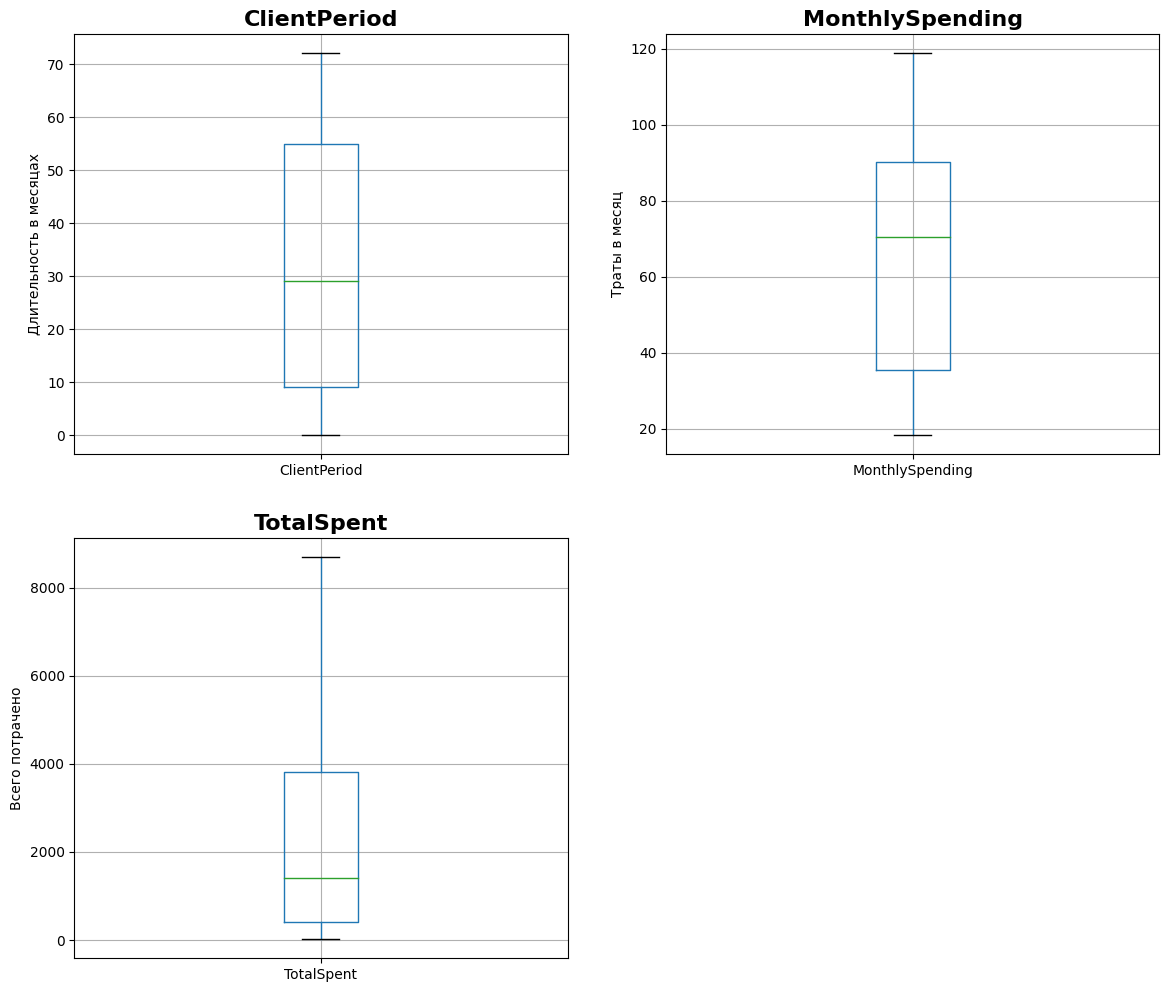

In [ ]:
fit = plt.figure(figsize=(14, 12))
fig.suptitle("Диаграммы размаха числовых признаков", fontweight="bold", fontsize=20)

for i, (col, ylabel) in enumerate(zip(num_cols, col_labels), 1):
    ax = plt.subplot(*subplots_shape, i)
    ax.set_title(col, fontsize=16, fontweight="bold")
    ax.set_ylabel(ylabel)
    data.boxplot(column=col, ax=ax)
    # TODO: fix problem with the TotalSpent column: ax.boxplot(data['TotalSpent]) doesn't draw a correct plot
    # ax.boxplot(data[col])  # doesn't work properly

Посмотрим на количество значений категориальных признаков:

In [ ]:
for col in cat_cols:
    print("Количество значений категориального признака {}:\n".format(col))
    print(data[col].value_counts())
    print()

Количество значений категориального признака Sex:

Male      2655
Female    2627
Name: Sex, dtype: Int64

Количество значений категориального признака IsSeniorCitizen:

No     4440
Yes     842
Name: IsSeniorCitizen, dtype: Int64

Количество значений категориального признака HasPartner:

No     2705
Yes    2577
Name: HasPartner, dtype: Int64

Количество значений категориального признака HasChild:

No     3676
Yes    1606
Name: HasChild, dtype: Int64

Количество значений категориального признака HasPhoneService:

Yes    4761
No      521
Name: HasPhoneService, dtype: Int64

Количество значений категориального признака HasMultiplePhoneNumbers:

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: Int64

Количество значений категориального признака HasInternetService:

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: Int64

Количество значений категориального признака HasOnlineSecuritySer

Построим столбчатые диаграммы для категориальных признаков:

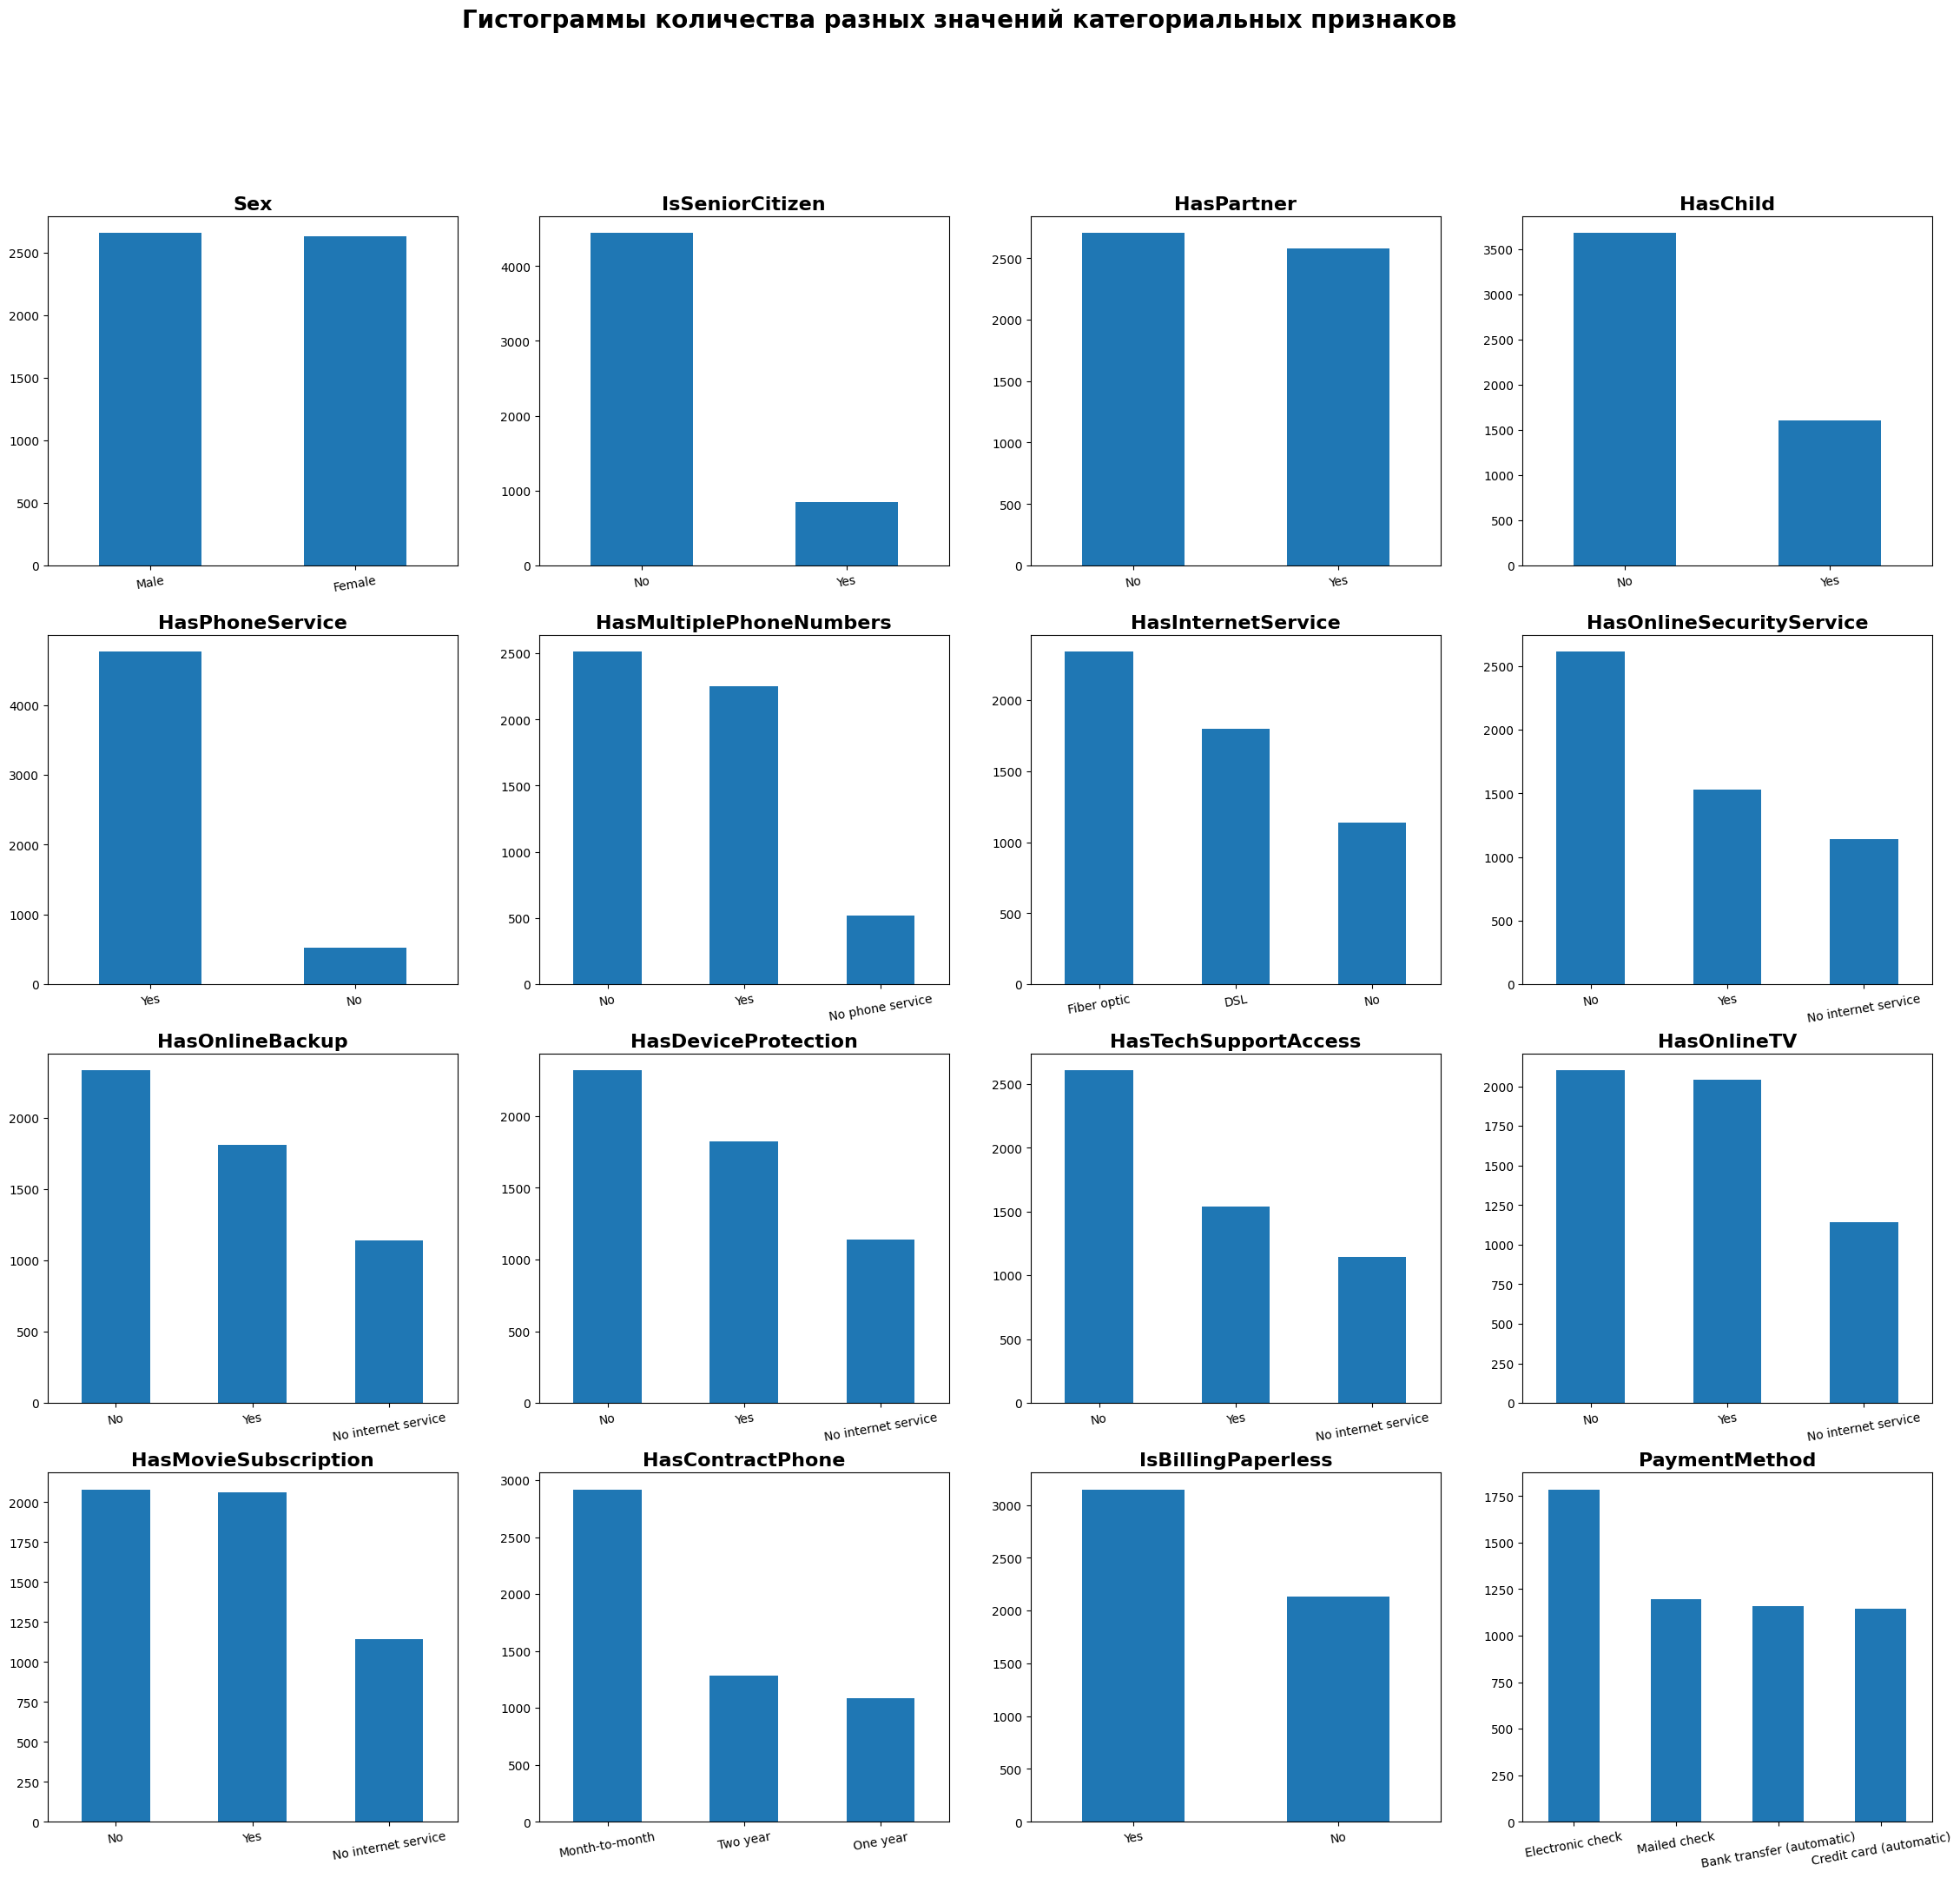

In [ ]:
cat_cols_num = len(cat_cols)
cells_by_horizontal = min(4, int(np.ceil(np.sqrt(cat_cols_num))))
cells_by_vertical = int(np.ceil(cat_cols_num / cells_by_horizontal))
subplots_shape = (cells_by_vertical, cells_by_horizontal)
fig = plt.figure(figsize=(7 * cells_by_horizontal , 6 * cells_by_vertical))
fig.suptitle("Гистограммы количества разных значений категориальных признаков", fontweight="bold", fontsize=20)

for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(*subplots_shape, i)
    ax.set_title(col, fontsize=16, fontweight="bold")

    data[col].value_counts().plot.bar(rot=10)
    # works too:
    # vc = data[col].value_counts()
    # ax.bar(vc.index, vc)
    # ax.set_xticklabels(vc.index, rotation=10)

Построим круговые диаграммы для категориальных признаков:

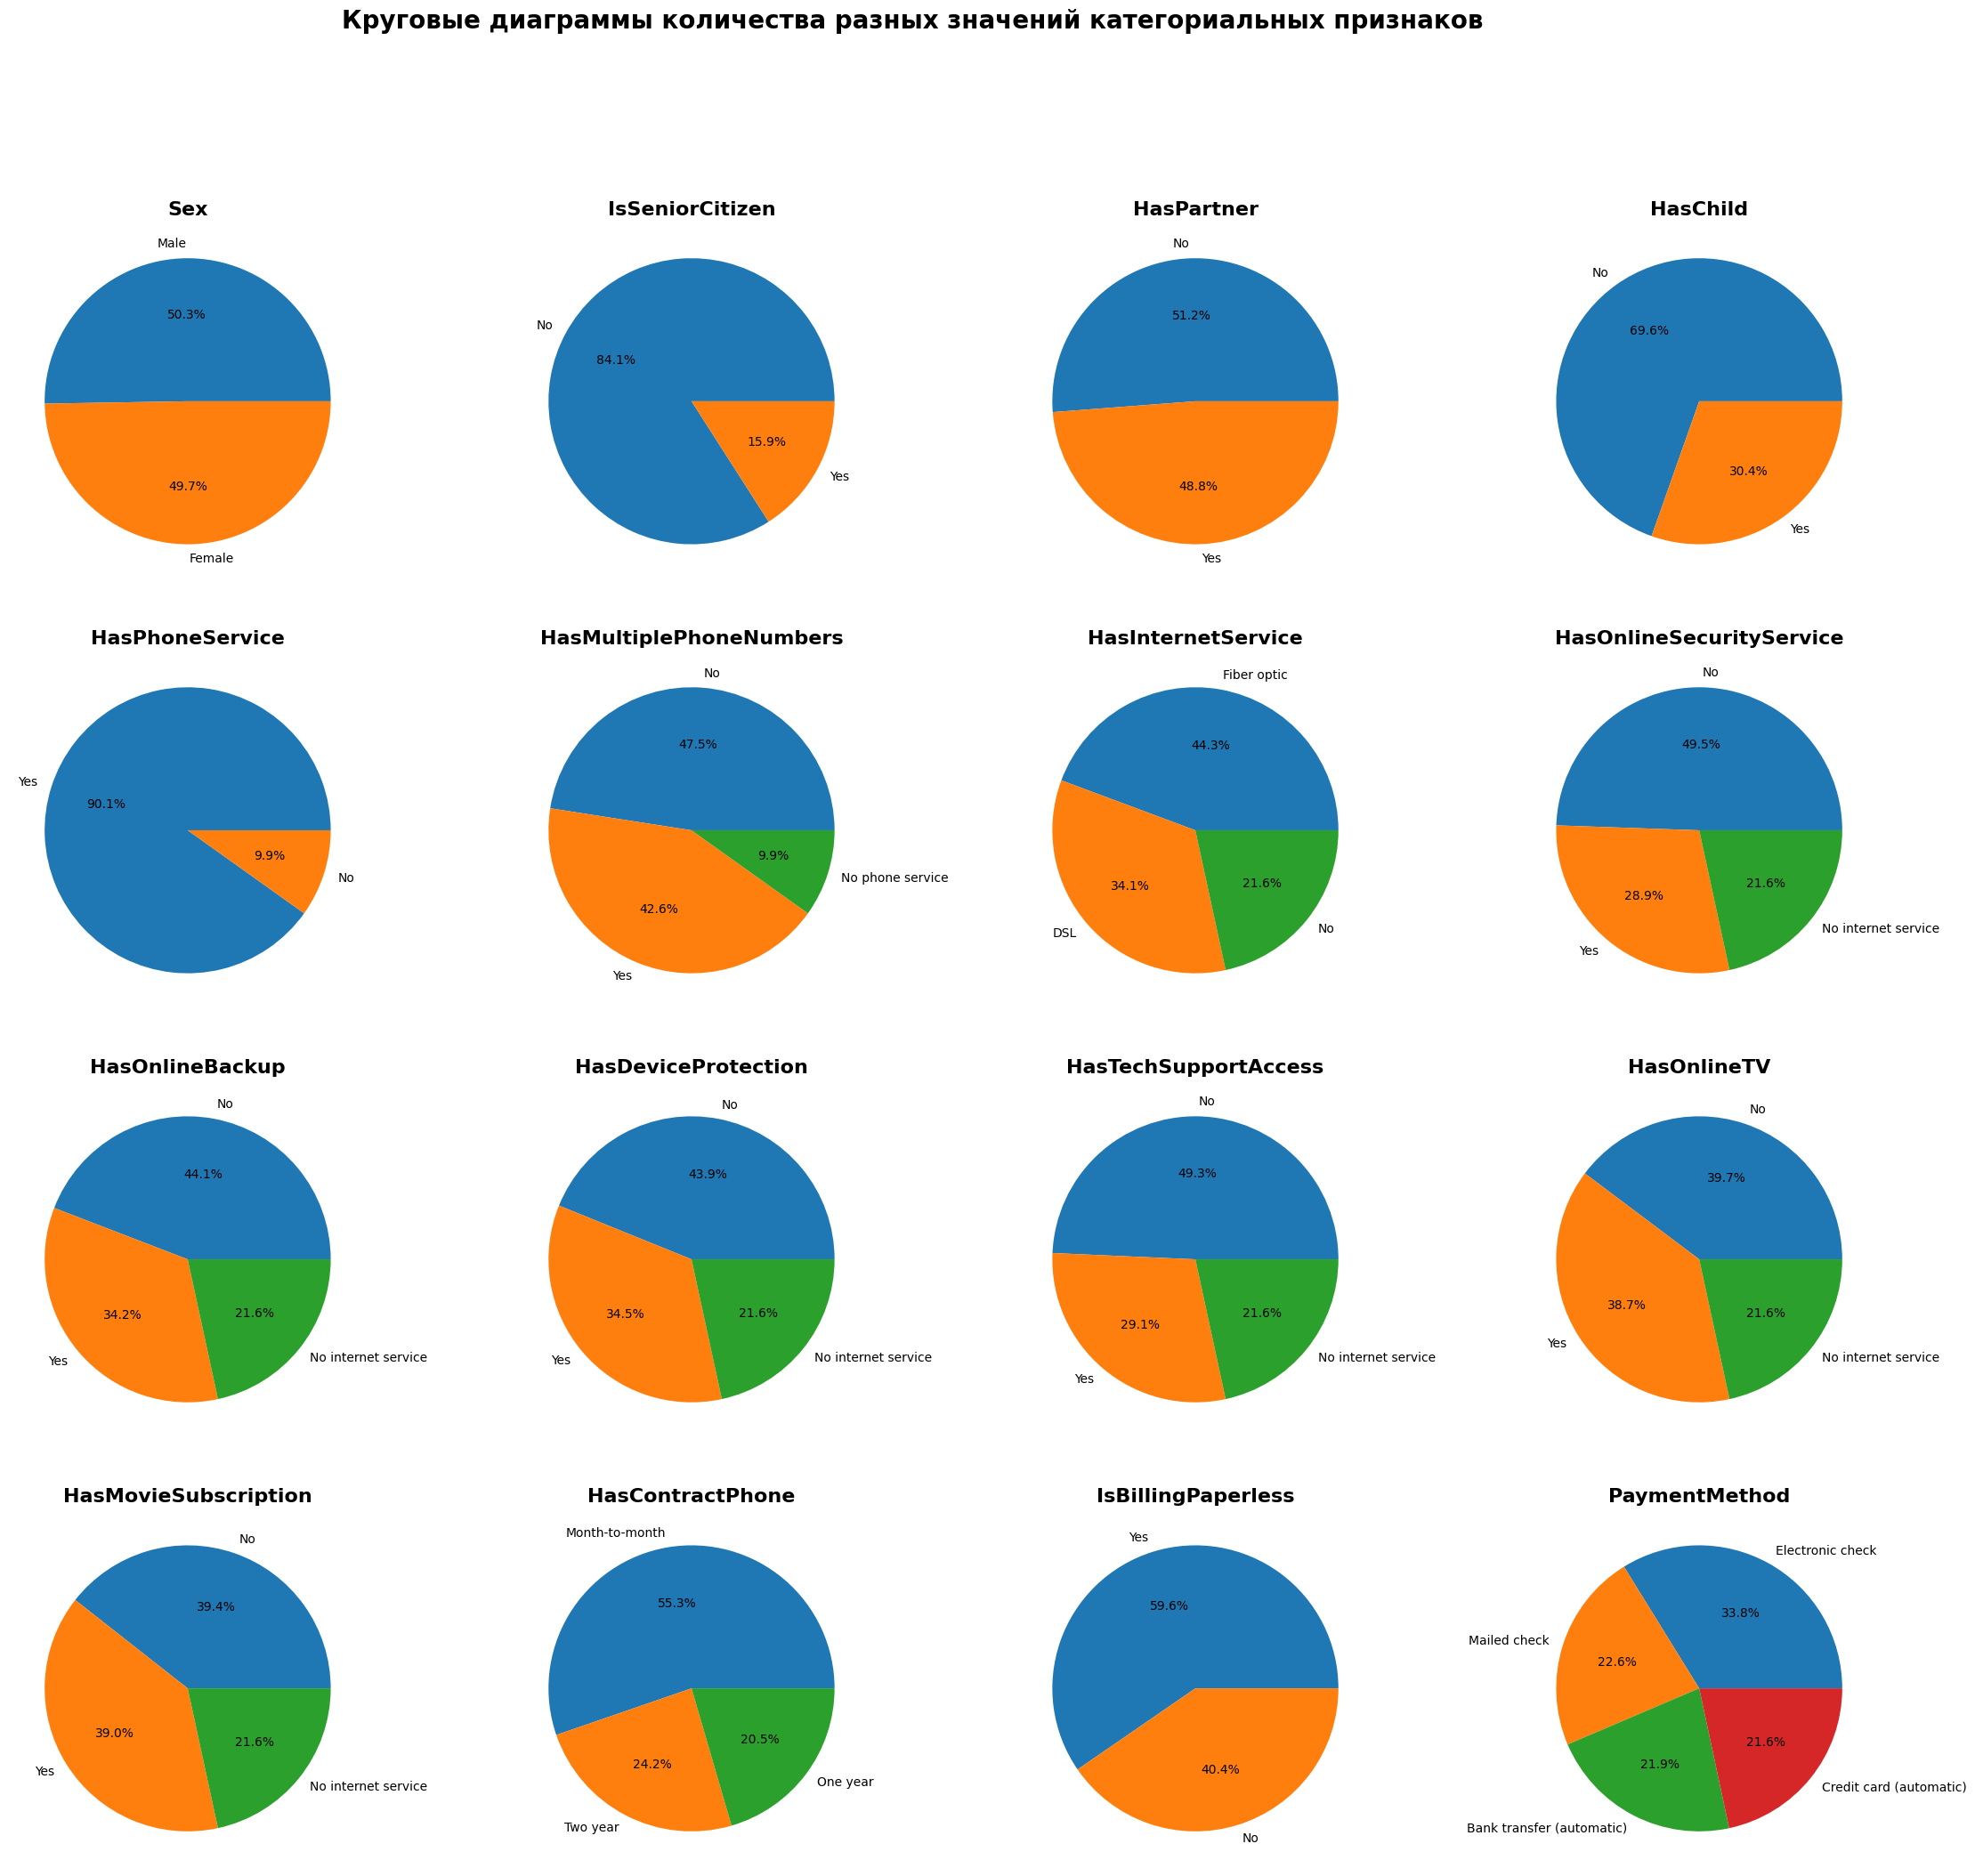

In [ ]:
fig = plt.figure(figsize=(7 * cells_by_horizontal , 6 * cells_by_vertical))
fig.suptitle("Круговые диаграммы количества разных значений категориальных признаков", fontweight="bold", fontsize=20)

for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(*subplots_shape, i)
    ax.set_title(col, fontsize=16, fontweight="bold")

    data[col].value_counts().plot.pie(ax=ax, autopct='%1.1f%%')
    ax.set_ylabel(None)


Посмотрим на распределение целевой переменной:

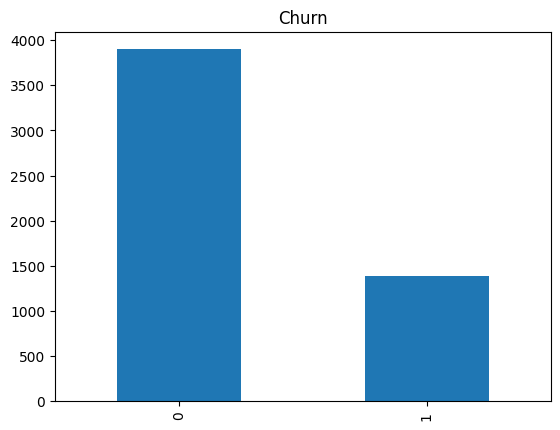

In [ ]:
tvc = data[target_col].value_counts()
tvc.plot.bar(title=target_col);

In [ ]:
tol = 0.2
target_class_percentage = tvc.loc[1] / sum(tvc)
print("Вывод: классы", "" if abs(target_class_percentage - 0.5) < tol else "не", "сбалансированы")

Вывод: классы не сбалансированы


In [ ]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.5,1026.35,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.9,75.90,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.3,2570.00,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.4,82.15,Male,No,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,No,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,No,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.0,2215.25,Female,No,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

## Этап решения #3: применение линейных моделей
Поскольку доля строк с NaN очень маленькая:

In [ ]:
nan_rows_num = data.apply(lambda row: row.isnull().any(), axis=1, raw=False).sum()
print("Доля строк с NaN:", nan_rows_num / len(data))

Доля строк с NaN: 0.0017039000378644452


просто избавимся от них, а затем разделим данные на признаки и целевую переменную:

In [ ]:
print("Количество строк в датасете\n\tдо удаления NaN:", len(data))
data = data.dropna()
print("\tпосле удаления NaN:", len(data))
X, y = data[feature_cols], data[target_col]

Количество строк в датасете
	до удаления NaN: 5282
	после удаления NaN: 5273


Построим пайплайн для обработки данных и последующего обучения модели:

In [ ]:
class DataTransformer:
    def __init__(self, num_cols, cat_cols, drop=None):
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self._scaler = StandardScaler()
        self._one_hot_encoder = OneHotEncoder(sparse=False, drop=drop)

    def clear_data(self, data):
        data.loc[data['IsSeniorCitizen'] == 1, 'IsSeniorCitizen'] = 'Yes'
        data.loc[data['IsSeniorCitizen'] == 0, 'IsSeniorCitizen'] = 'No'
        data = data.convert_dtypes()
        data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
        data = data.fillna(data.mean())
        return data

    def fit(self, data, target=None):
        data = self.clear_data(data)
        self._scaler.fit(data[self.num_cols])
        self._one_hot_encoder.fit(data[self.cat_cols])

    def transform(self, data, target=None):
        data = self.clear_data(data)
        scaled_num_cols = self._scaler.transform(data[self.num_cols])
        encoded_cat_cols = self._one_hot_encoder.transform(data[self.cat_cols])
        return np.hstack((scaled_num_cols, encoded_cat_cols))

    def fit_transform(self, data, target=None):
        data = self.clear_data(data)
        scaled_num_cols = self._scaler.fit_transform(data[self.num_cols])
        encoded_cat_cols = self._one_hot_encoder.fit_transform(data[self.cat_cols])
        return np.hstack((scaled_num_cols, encoded_cat_cols))

from sklearn.pipeline import Pipeline
clsf = Pipeline(steps=[('datatransformer', DataTransformer(num_cols, cat_cols, drop='first')), ('logistic', LogisticRegression(random_state=42))])

Найдем лучшие параметры:

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold

grid_search = GridSearchCV(clsf, param_grid={'logistic__C': [100, 10, 1, 0.1, 0.01, 0.001]},
                               cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=make_scorer(roc_auc_score), n_jobs=-1,
                               verbose=10)
X, y = data[feature_cols], data[target_col].astype('int8')
grid_search.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


<ipython-input-32-6e99842fdcec>:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('datatransformer',
                                        <__main__.DataTransformer object at 0x7a8cbfb841f0>),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring=make_scorer(roc_auc_score), verbose=10)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество: 0.718679599091584 с параметрами {'logistic__C': 1}

In [ ]:
print("Лучшее качество: {} с параметрами {}".format(grid_search.best_score_, grid_search.best_params_))

Лучшее качество: 0.718679599091584 с параметрами {'logistic__C': 1}


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

## Этап решения #4: применение градиентного бустинга

In [ ]:
# data = pd.read_csv('./train.csv')
# X, y = data[feature_cols], data[target_col].astype('int8')

In [ ]:
!pip install catboost
import catboost

categorical_indices = list(X.columns.get_loc(col) for col in cat_cols)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=42)
boosting_model = catboost.CatBoostClassifier(n_estimators=200, cat_features=categorical_indices)
boosting_model.fit(X_train, y_train)
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
print("\nКачество при стандартных параметрах:", roc_auc_score(y_test, y_test_predicted))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.0 MB/s eta 0:00:00
Learning rate set to 0.083332
0:	learn: 0.6393850	total: 65.9ms	remaining: 13.1s
1:	learn: 0.5986678	total: 80.7ms	remaining: 7.99s
2:	learn: 0.5669397	total: 94.1ms	remaining: 6.18s
3:	learn: 0.5401092	total: 124ms	remaining: 6.1s
4:	learn: 0.5184259	total: 140ms	remaining: 5.46s
5:	learn: 0.5006508	total: 154ms	remaining: 4.98s
6:	learn: 0.4860068	total: 167ms	remaining: 4.61s
7:	learn: 0.4729220	total: 180ms	remaining: 4.33s
8:	learn: 0.4613053	total: 194ms	remaining: 4.13s
9:	learn: 0.4518849	total: 213ms	remaining: 4.05s
10:	learn: 0.4444709	total: 230ms	remaining: 3.95s
11:	learn: 0.4389258	total: 243ms	remaining: 3.81s
12:	learn: 0.4351742	total: 258ms	remaining: 3.72s
13:	learn: 0.4308061	total: 278ms	remaining: 3.69s
14:	learn: 0.4263292	total: 293ms	remaining: 3.61s
15:	learn: 0.4224699	total: 308ms	remaining: 3.54s
16:	learn: 0.4199115	total: 320ms	remaining: 3.45s
17:	learn: 0.4175362	total: 332

In [49]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=categorical_indices,
                                             eval_metric='AUC')
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}
boosting_grid_search_res = boosting_model.grid_search(grid,
                           X.values,
                           y.values, train_size=0.8, cv=5, plot=False, verbose=10, refit=True)

Выходные данные были обрезаны до нескольких последних строк (5000).
129:	test: 0.8625979	best: 0.8634163 (106)	total: 3.19s	remaining: 1.72s
130:	test: 0.8626471	best: 0.8634163 (106)	total: 3.21s	remaining: 1.69s
131:	test: 0.8627503	best: 0.8634163 (106)	total: 3.26s	remaining: 1.68s
132:	test: 0.8627601	best: 0.8634163 (106)	total: 3.27s	remaining: 1.65s
133:	test: 0.8626913	best: 0.8634163 (106)	total: 3.29s	remaining: 1.62s
134:	test: 0.8626717	best: 0.8634163 (106)	total: 3.32s	remaining: 1.6s
135:	test: 0.8626667	best: 0.8634163 (106)	total: 3.35s	remaining: 1.58s
136:	test: 0.8626618	best: 0.8634163 (106)	total: 3.38s	remaining: 1.55s
137:	test: 0.8628437	best: 0.8634163 (106)	total: 3.4s	remaining: 1.53s
138:	test: 0.8628584	best: 0.8634163 (106)	total: 3.41s	remaining: 1.5s
139:	test: 0.8628928	best: 0.8634163 (106)	total: 3.44s	remaining: 1.48s
140:	test: 0.8629174	best: 0.8634163 (106)	total: 3.45s	remaining: 1.44s
141:	test: 0.8628633	best: 0.8634163 (106)	total: 3.49s	rem

In [48]:
boosting_model = catboost.CatBoostClassifier(**boosting_grid_search_res['params'], n_estimators=200,
                                             cat_features=categorical_indices,
                                             eval_metric='AUC')
boosting_model.fit(X_train, y_train)
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_predicted)

0:	total: 13ms	remaining: 2.58s
1:	total: 23.6ms	remaining: 2.33s
2:	total: 34.2ms	remaining: 2.24s
3:	total: 43.1ms	remaining: 2.11s
4:	total: 51.4ms	remaining: 2s
5:	total: 62.1ms	remaining: 2.01s
6:	total: 72.2ms	remaining: 1.99s
7:	total: 81.3ms	remaining: 1.95s
8:	total: 88.4ms	remaining: 1.88s
9:	total: 97.8ms	remaining: 1.86s
10:	total: 107ms	remaining: 1.83s
11:	total: 121ms	remaining: 1.89s
12:	total: 138ms	remaining: 1.99s
13:	total: 151ms	remaining: 2.01s
14:	total: 160ms	remaining: 1.97s
15:	total: 169ms	remaining: 1.94s
16:	total: 178ms	remaining: 1.92s
17:	total: 185ms	remaining: 1.87s
18:	total: 194ms	remaining: 1.85s
19:	total: 203ms	remaining: 1.82s
20:	total: 218ms	remaining: 1.86s
21:	total: 227ms	remaining: 1.83s
22:	total: 235ms	remaining: 1.81s
23:	total: 244ms	remaining: 1.79s
24:	total: 254ms	remaining: 1.78s
25:	total: 262ms	remaining: 1.75s
26:	total: 272ms	remaining: 1.75s
27:	total: 282ms	remaining: 1.73s
28:	total: 290ms	remaining: 1.71s
29:	total: 298ms	re

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество: 0.8255972885363083 с параметрами {'depth': 4, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [50]:
print("Лучшее качество: {} с параметрами {}".format(test_auc, boosting_grid_search_res['params']))

Лучшее качество: 0.8423779193205945 с параметрами {'depth': 4, 'l2_leaf_reg': 5, 'learning_rate': 0.03}


# Предсказания

In [53]:
# best_model = grid_search.best_estimator_
best_model = boosting_model

In [54]:
best_model.predict_proba(X_test)[:, 1]

array([0.25988261, 0.14687794, 0.02319539, ..., 0.20453153, 0.47136992,
       0.30328769])

In [56]:
X_test = pd.read_csv('./test.csv')
# submission = pd.read_csv('./submission.csv')

predicted_labels = best_model.predict_proba(X_test)[:, 1]
df = pd.DataFrame({'Churn': predicted_labels}, index=np.arange(len(predicted_labels)))
df.index.name = 'Id'
df.to_csv('./my_submission.csv')